<a href="https://colab.research.google.com/github/lathamithu/Techvolt-Intern/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline

Data preprocessing

In [167]:
train = pd.read_csv("train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [168]:
train = train.set_index('Loan_ID')
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [169]:
train['Dependents'] = train['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [170]:
train['Education'] = LabelEncoder().fit(train['Education']).transform(train['Education'])
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0.0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3.0,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1.0,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [171]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['LoanAmount'] = train['LoanAmount'].replace(0, np.NaN)

train['Loan_Amount_Term'] = train['Loan_Amount_Term'].replace(0, np.NaN)

train['Loan_Amount_Term'] = train['Loan_Amount_Term'].replace(0, np.NaN)

train.fillna(train.mean(),inplace=True)

In [172]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,0,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,1,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [173]:
train['Gender'] = LabelEncoder().fit(train['Gender']).transform(train['Gender'])

train['Married'] = LabelEncoder().fit(train['Married']).transform(train['Married'])

train['Self_Employed'] = LabelEncoder().fit(train['Self_Employed']).transform(train['Self_Employed'])

train['Property_Area'] = LabelEncoder().fit(train['Property_Area']).transform(train['Property_Area'])

train['Loan_Status'] = LabelEncoder().fit(train['Loan_Status']).transform(train['Loan_Status'])

In [174]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [175]:
x = train.drop(['Loan_Status'], axis = 1)
y = train['Loan_Status']


**LOGISTIC REGRESSION**

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [178]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185



In [180]:
confusion_matrix(y_test, predictions)

array([[ 23,  28],
       [  3, 131]])

In [181]:
accuracy_score(y_test, predictions)

0.8324324324324325

In [182]:
probs = logmodel.predict_proba(X_test)
probs

array([[0.23235952, 0.76764048],
       [0.24539482, 0.75460518],
       [0.22232003, 0.77767997],
       [0.15819318, 0.84180682],
       [0.16982435, 0.83017565],
       [0.79128373, 0.20871627],
       [0.09121893, 0.90878107],
       [0.31838793, 0.68161207],
       [0.84874715, 0.15125285],
       [0.19701596, 0.80298404],
       [0.23815356, 0.76184644],
       [0.15918281, 0.84081719],
       [0.29232893, 0.70767107],
       [0.23245934, 0.76754066],
       [0.15410348, 0.84589652],
       [0.12843155, 0.87156845],
       [0.52229051, 0.47770949],
       [0.3863597 , 0.6136403 ],
       [0.29521795, 0.70478205],
       [0.85490259, 0.14509741],
       [0.77984895, 0.22015105],
       [0.19054481, 0.80945519],
       [0.20536738, 0.79463262],
       [0.24012053, 0.75987947],
       [0.27712498, 0.72287502],
       [0.21209786, 0.78790214],
       [0.33699003, 0.66300997],
       [0.24408143, 0.75591857],
       [0.77944233, 0.22055767],
       [0.83936884, 0.16063116],
       [0.

In [183]:
prob_positive  = probs[:,1]      
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve:", roc_auc)

Area under the curve: 0.7541703248463565


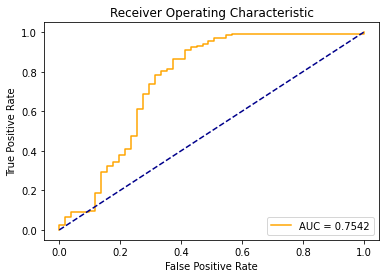

In [184]:
# Plot ROC curve

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**KNN**

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [187]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [188]:
pred = knn.predict(X_test)

In [189]:
print(confusion_matrix(y_test,pred))

[[17 34]
 [46 88]]


In [190]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.27      0.33      0.30        51
           1       0.72      0.66      0.69       134

    accuracy                           0.57       185
   macro avg       0.50      0.50      0.49       185
weighted avg       0.60      0.57      0.58       185



In [191]:
error_rate = []



for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

print(error_rate)

[0.43243243243243246, 0.4864864864864865, 0.40540540540540543, 0.42162162162162165, 0.372972972972973, 0.3891891891891892, 0.3675675675675676, 0.372972972972973, 0.31891891891891894, 0.35135135135135137, 0.3081081081081081, 0.34594594594594597, 0.32432432432432434, 0.33513513513513515, 0.32432432432432434, 0.31351351351351353, 0.2972972972972973, 0.32972972972972975, 0.3027027027027027, 0.31351351351351353, 0.2972972972972973, 0.31351351351351353, 0.2972972972972973, 0.2972972972972973, 0.2864864864864865, 0.2918918918918919, 0.2810810810810811, 0.2864864864864865, 0.2810810810810811, 0.2810810810810811, 0.2810810810810811, 0.2864864864864865, 0.2918918918918919, 0.2864864864864865, 0.2810810810810811, 0.2810810810810811, 0.2756756756756757, 0.2810810810810811, 0.2756756756756757]


Text(0, 0.5, 'Error Rate')

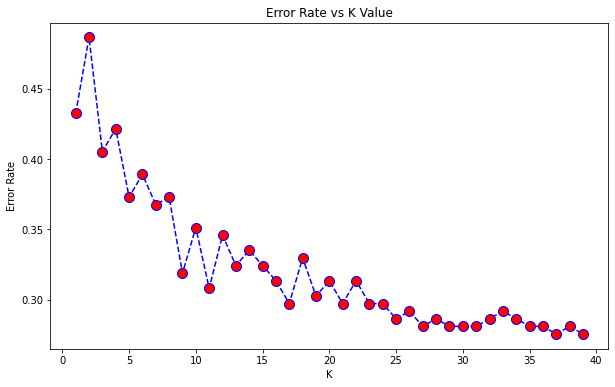

In [192]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [193]:
knn = KNeighborsClassifier(n_neighbors = 25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = 25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K = 25


[[  2  49]
 [  4 130]]


              precision    recall  f1-score   support

           0       0.33      0.04      0.07        51
           1       0.73      0.97      0.83       134

    accuracy                           0.71       185
   macro avg       0.53      0.50      0.45       185
weighted avg       0.62      0.71      0.62       185



**NAIVE BAYES**

In [194]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [195]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [196]:
print('Model accuracy score : {0:0.4f}' . format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8216


In [197]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0,0])

print('\nTrue Negatives (TN) = ', cm[1,1])

print('\nFalse Positives (FP) = ', cm[0,1])

print('\nFalse Negatives (FN) = ', cm[1,0])

Confusion matrix

 [[ 22  29]
 [  4 130]]

True Positives (TP) =  22

True Negatives (TN) =  130

False Positives (FP) =  29

False Negatives (FN) =  4


In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57        51
           1       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185



**SVM**

*Linear Kernel*

In [199]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [200]:
y_pred = svclassifier.predict(X_test)

In [201]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 21  30]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



*Polynomial Kernel*

In [202]:
svclassifier1 = SVC(kernel = 'poly', degree = 8)
svclassifier1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [203]:
y_pred1 = svclassifier1.predict(X_test)

In [204]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[  0  51]
 [  1 133]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      0.99      0.84       134

    accuracy                           0.72       185
   macro avg       0.36      0.50      0.42       185
weighted avg       0.52      0.72      0.61       185



*RBF Kernel or the Gaussian Kernel*

In [205]:
svclassifier2 = SVC(kernel = 'rbf')
svclassifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [206]:
y_pred2 = svclassifier2.predict(X_test)

In [207]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[  0  51]
 [  0 134]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      1.00      0.84       134

    accuracy                           0.72       185
   macro avg       0.36      0.50      0.42       185
weighted avg       0.52      0.72      0.61       185



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*Sigmoid Kernel*

In [208]:
svclassifier3 = SVC(kernel = 'sigmoid')
svclassifier3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [209]:
y_pred3 = svclassifier3.predict(X_test)

In [210]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[ 9 42]
 [35 99]]
              precision    recall  f1-score   support

           0       0.20      0.18      0.19        51
           1       0.70      0.74      0.72       134

    accuracy                           0.58       185
   macro avg       0.45      0.46      0.45       185
weighted avg       0.56      0.58      0.57       185



**DECISION TREE**

In [211]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [212]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1])

In [213]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix is :', cm, sep = '\n')

Confusion matrix is :
[[ 28  23]
 [ 20 114]]


In [214]:
cols = list(x.columns.values)

In [215]:
print('Accuracy (in %) :', accuracy_score(y_test, y_pred)*100)

Accuracy (in %) : 76.75675675675676


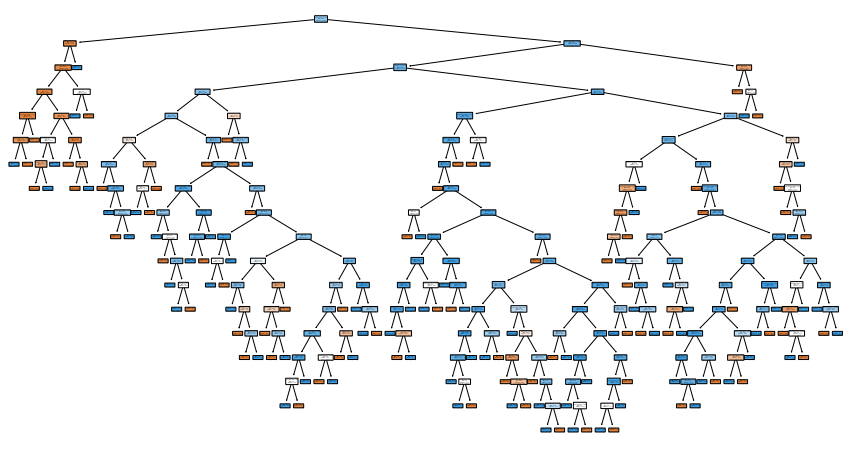

In [216]:
from sklearn import tree

plt.figure(figsize = (15,8))
tree.plot_tree(clf.fit(x, y), feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True)
plt.show()

*PRUNING*

In [217]:
clf = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [218]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [219]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix is :', cm, sep = '\n')

Confusion matrix is :
[[ 21  30]
 [  2 132]]


In [220]:
cols = list(x.columns.values)

In [221]:
print('Accuracy (in %) :', accuracy_score(y_test, y_pred)*100)

Accuracy (in %) : 82.70270270270271


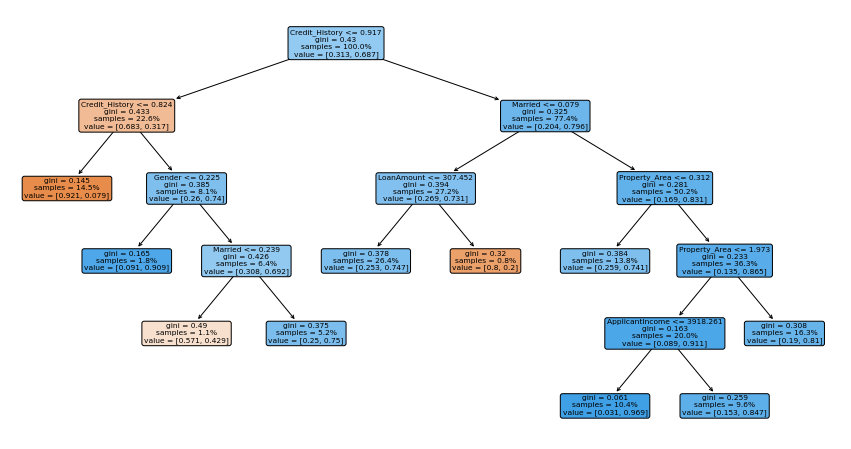

In [222]:
from sklearn import tree
plt.figure(figsize = (15,8))
tree.plot_tree(clf.fit(x, y), feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True)
plt.show()

**RANDOM FOREST**

In [223]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 3)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [224]:
y_pred = classifier.predict(X_test)

In [225]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[ 21  30]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

0.827027027027027


In [226]:
feature_imp = pd.Series(classifier.feature_importances_, index = x.columns).sort_values(ascending = False)

In [227]:
feature_imp

Credit_History       0.616304
ApplicantIncome      0.118037
LoanAmount           0.103016
CoapplicantIncome    0.061363
Property_Area        0.036916
Married              0.020773
Loan_Amount_Term     0.019292
Dependents           0.012644
Gender               0.010812
Education            0.000843
Self_Employed        0.000000
dtype: float64

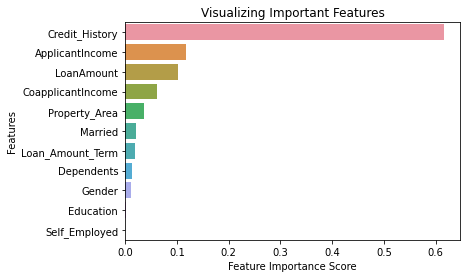

In [228]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [229]:
from sklearn.feature_selection import SelectFromModel
feat_sel = SelectFromModel(classifier, threshold = 0.1)
feat_sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=3,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20, n_jobs=None,
                                                 oob_score=False,
                                                 ran

In [230]:
X_imp_train = feat_sel.transform(X_train)
X_imp_test = feat_sel.transform(X_test)

In [231]:
clf_imp = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 7)
clf_imp.fit(X_imp_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [232]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.827027027027027

In [233]:
y_imp_pred = clf_imp.predict(X_imp_test)
accuracy_score(y_test, y_imp_pred)

0.8

**PREDICTING TEST DATA**

Data preprocessing

In [234]:
test = pd.read_csv("test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [235]:
test = test.set_index('Loan_ID')
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [236]:
test['Dependents'] = test['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [237]:
test['Education'] = LabelEncoder().fit(test['Education']).transform(test['Education'])

In [238]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

test['LoanAmount'] = test['LoanAmount'].replace(0, np.NaN)

test['Loan_Amount_Term'] = test['Loan_Amount_Term'].replace(0, np.NaN)

test['Loan_Amount_Term'] = test['Loan_Amount_Term'].replace(0, np.NaN)

test.fillna(test.mean(),inplace=True)

In [239]:
test['Gender'] = LabelEncoder().fit(test['Gender']).transform(test['Gender'])

test['Married'] = LabelEncoder().fit(test['Married']).transform(test['Married'])

test['Self_Employed'] = LabelEncoder().fit(test['Self_Employed']).transform(test['Self_Employed'])

test['Property_Area'] = LabelEncoder().fit(test['Property_Area']).transform(test['Property_Area'])


Proceeding with SVM (linear kernel) since it has an accuracy of 86%

In [240]:
y_pred = svclassifier.predict(test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [241]:
svclassifier.score(test, y_pred)

1.0

In [242]:
test['Loan_Status'] = y_pred.tolist()
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.000000,2,1
LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.000000,2,1
LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.000000,2,1
LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.825444,2,1
LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.000000,2,1


In [243]:
x = test.drop(['Loan_Status'], axis = 1)
y = test['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [244]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [245]:
y_pred = svclassifier.predict(X_test)

In [246]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  3]
 [ 1 93]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.97      0.99      0.98        94

    accuracy                           0.96       111
   macro avg       0.95      0.91      0.93       111
weighted avg       0.96      0.96      0.96       111

